# AtmoPollution

In [1]:
import pandas as pd
import pickle as pkl
import seaborn as sns
import numpy as np

import statsmodels.formula.api as smf
import statsmodels.api as sm
from summarytools import dfSummary

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import f_regression

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

with open('feinstaubdataexercise.pickle', 'rb') as file:
    dailymeansdata = pkl.load(file)
    
print(dailymeansdata)
dailymeansdata["Graz-DB"].head()

{'Graz-DB':                                  day_type   humidity      temp        no2  \
DateTime                                                                    
2015-01-01 00:00:00+00:00  Sunday/Holiday  76.086280 -3.114223  55.883530   
2015-01-02 00:00:00+00:00         Weekday  84.450230  0.345273  82.513820   
2015-01-03 00:00:00+00:00        Saturday  89.667440  1.184227  65.594920   
2015-01-04 00:00:00+00:00  Sunday/Holiday  61.433243  3.666447  21.547293   
2015-01-05 00:00:00+00:00         Weekday  72.254745  2.146478  40.342360   
...                                   ...        ...       ...        ...   
2020-12-27 00:00:00+00:00  Sunday/Holiday  80.488220 -2.868204  27.720545   
2020-12-28 00:00:00+00:00         Weekday  90.744225 -0.705294  36.626446   
2020-12-29 00:00:00+00:00         Weekday  92.967810  1.020848  45.060910   
2020-12-30 00:00:00+00:00         Weekday  93.184120  2.721566  41.690440   
2020-12-31 00:00:00+00:00         Weekday  89.811880  2.041227  

day_type   humidity      temp        no2  \
DateTime                                                                    
2015-01-01 00:00:00+00:00  Sunday/Holiday  76.086280 -3.114223  55.883530   
2015-01-02 00:00:00+00:00         Weekday  84.450230  0.345273  82.513820   
2015-01-03 00:00:00+00:00        Saturday  89.667440  1.184227  65.594920   
2015-01-04 00:00:00+00:00  Sunday/Holiday  61.433243  3.666447  21.547293   
2015-01-05 00:00:00+00:00         Weekday  72.254745  2.146478  40.342360   

                                 pm10      prec  windspeed  peak_velocity  
DateTime                                                                   
2015-01-01 00:00:00+00:00  113.757540  0.000000   0.285276       1.587069  
2015-01-02 00:00:00+00:00   94.340850  0.000000   0.184891       2.116092  
2015-01-03 00:00:00+00:00   58.921513  0.000000   0.298194       2.997797  
2015-01-04 00:00:00+00:00   19.053576  2.472168   1.427332      13.225575  
2015-01-05 00:00:00+00:00   14.491992  0.998253   1.079748       9.698755

# 1. Untersuchen Sie die Zusammenhänge der einzelnen Prädiktoren mit den beiden responses. In welchen Bereichen befinden sich die Daten? Wie sehen die Daten über die Zeit verteilt aus? Gibt es missing data? Erstellen Sie aussagekräftige Plots und machen Sie sich ein Bild über die Datenlage.

In [2]:
data = dailymeansdata["Graz-DB"]
data.head()

day_type   humidity      temp        no2  \
DateTime                                                                    
2015-01-01 00:00:00+00:00  Sunday/Holiday  76.086280 -3.114223  55.883530   
2015-01-02 00:00:00+00:00         Weekday  84.450230  0.345273  82.513820   
2015-01-03 00:00:00+00:00        Saturday  89.667440  1.184227  65.594920   
2015-01-04 00:00:00+00:00  Sunday/Holiday  61.433243  3.666447  21.547293   
2015-01-05 00:00:00+00:00         Weekday  72.254745  2.146478  40.342360   

                                 pm10      prec  windspeed  peak_velocity  
DateTime                                                                   
2015-01-01 00:00:00+00:00  113.757540  0.000000   0.285276       1.587069  
2015-01-02 00:00:00+00:00   94.340850  0.000000   0.184891       2.116092  
2015-01-03 00:00:00+00:00   58.921513  0.000000   0.298194       2.997797  
2015-01-04 00:00:00+00:00   19.053576  2.472168   1.427332      13.225575  
2015-01-05 00:00:00+00:00   14.491992  0.998253   1.079748       9.698755

In [3]:
print(data.index)

DatetimeIndex(['2015-01-01 00:00:00+00:00', '2015-01-02 00:00:00+00:00',
               '2015-01-03 00:00:00+00:00', '2015-01-04 00:00:00+00:00',
               '2015-01-05 00:00:00+00:00', '2015-01-06 00:00:00+00:00',
               '2015-01-07 00:00:00+00:00', '2015-01-08 00:00:00+00:00',
               '2015-01-09 00:00:00+00:00', '2015-01-10 00:00:00+00:00',
               ...
               '2020-12-22 00:00:00+00:00', '2020-12-23 00:00:00+00:00',
               '2020-12-24 00:00:00+00:00', '2020-12-25 00:00:00+00:00',
               '2020-12-26 00:00:00+00:00', '2020-12-27 00:00:00+00:00',
               '2020-12-28 00:00:00+00:00', '2020-12-29 00:00:00+00:00',
               '2020-12-30 00:00:00+00:00', '2020-12-31 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='DateTime', length=2161, freq=None)


In [4]:
# Verwenden Sie zur Modellbildung ausschließlich die Daten aus 2015 – 2019

data1519 = data[data.index.year != 2020]
data1519.tail()

day_type   humidity      temp        no2  \
DateTime                                                                    
2019-12-27 00:00:00+00:00         Weekday  88.978780  1.669536  47.676907   
2019-12-28 00:00:00+00:00        Saturday  53.859238  1.897964  26.288273   
2019-12-29 00:00:00+00:00  Sunday/Holiday  64.601600 -1.364513  35.675564   
2019-12-30 00:00:00+00:00         Weekday  76.219124 -2.257874  51.466297   
2019-12-31 00:00:00+00:00         Weekday  75.055660  2.199772  57.068943   

                                pm10      prec  windspeed  peak_velocity  
DateTime                                                                  
2019-12-27 00:00:00+00:00  18.317930  0.197115   0.404630       2.645115  
2019-12-28 00:00:00+00:00  11.508529  0.000000   1.091225       8.817050  
2019-12-29 00:00:00+00:00  20.209654  0.000000   0.518293       6.700958  
2019-12-30 00:00:00+00:00  40.384453  0.000000   0.399608       2.292433  
2019-12-31 00:00:00+00:00  55.679170  0.000000   0.242542       2.027922

## Gibt es missing data?

In [5]:
rows_with_na = data1519[data1519.isna().any(axis=1)]
print(rows_with_na)

                          day_type   humidity       temp        no2  \
DateTime                                                              
2015-06-29 00:00:00+00:00  Weekday  63.479115  18.813822  38.872180   
2015-06-30 00:00:00+00:00  Weekday  67.492770  20.877440  37.622490   
2016-10-17 00:00:00+00:00  Weekday  85.169820  13.786567  40.221878   
2016-10-18 00:00:00+00:00  Weekday  93.783300   9.618448  24.532623   
2016-10-19 00:00:00+00:00  Weekday  92.930450   8.665779  27.888947   
2016-10-20 00:00:00+00:00  Weekday  91.655174   6.887677  46.994686   
2017-07-25 00:00:00+00:00  Weekday  57.978317  18.770864        NaN   
2017-10-24 00:00:00+00:00  Weekday  53.386494  11.998291  35.670430   
2018-04-03 00:00:00+00:00  Weekday  46.298080  14.341651  32.686497   
2018-04-04 00:00:00+00:00  Weekday  47.548466  15.126514  21.296385   
2019-05-27 00:00:00+00:00  Weekday  89.769810  15.651340        NaN   
2019-07-24 00:00:00+00:00  Weekday  60.172974  26.615530  32.792350   
2019-0

Verlorene Daten können wir nicht einfach wiederherstellen, deswegen löschen wir diese.

In [6]:
data1519 = data1519.dropna()

## Information über das Dataset

In [7]:
data1519.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1781 entries, 2015-01-01 00:00:00+00:00 to 2019-12-31 00:00:00+00:00
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   day_type       1781 non-null   category
 1   humidity       1781 non-null   float64 
 2   temp           1781 non-null   float64 
 3   no2            1781 non-null   float64 
 4   pm10           1781 non-null   float64 
 5   prec           1781 non-null   float64 
 6   windspeed      1781 non-null   float64 
 7   peak_velocity  1781 non-null   float64 
dtypes: category(1), float64(7)
memory usage: 113.2 KB


In [8]:
dfSummary(data1519)

In [9]:
data1519.describe()

humidity         temp          no2         pm10         prec  \
count  1781.000000  1781.000000  1781.000000  1781.000000  1781.000000   
mean     72.986806    11.585861    42.195066    28.107643     1.908240   
std      12.594316     8.360476    14.198488    16.194039     5.221898   
min      37.992634   -10.208468     9.518155     3.976876     0.000000   
25%      63.529130     4.786149    31.773354    17.190351     0.000000   
50%      72.687500    11.814347    40.342360    23.910543     0.000000   
75%      83.146920    18.753840    50.255283    34.514850     0.800977   
max      97.546480    28.999367   104.850220   153.803670    69.523677   

         windspeed  peak_velocity  
count  1781.000000    1781.000000  
mean      0.616937       5.948266  
std       0.355403       3.314267  
min       0.114222       1.322557  
25%       0.402065       3.438649  
50%       0.529203       5.025719  
75%       0.715580       7.935345  
max       3.000588      26.539320

In [10]:
print("Minima")
print(data1519.min())

print("\nMaxima")
print(data1519.max())

Minima
day_type           Weekday
humidity         37.992634
temp            -10.208468
no2               9.518155
pm10              3.976876
prec                   0.0
windspeed         0.114222
peak_velocity     1.322557
dtype: object

Maxima
day_type         Sunday/Holiday
humidity               97.54648
temp                  28.999367
no2                   104.85022
pm10                  153.80367
prec                  69.523677
windspeed              3.000588
peak_velocity          26.53932
dtype: object


## Die Daten über die Zeit verteilt

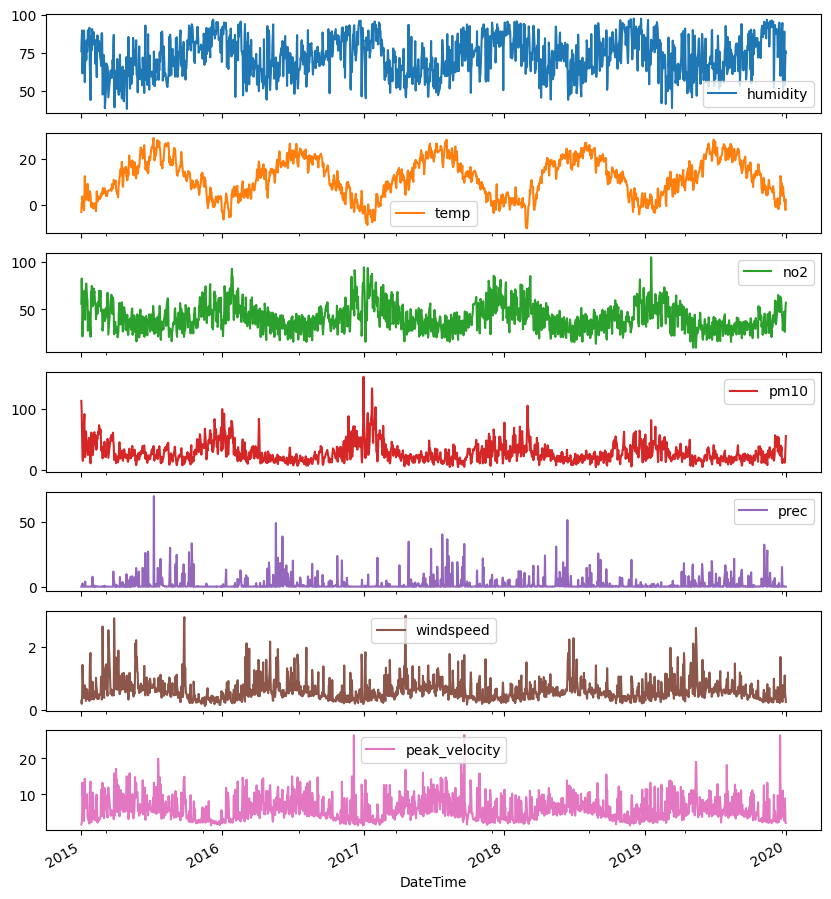

In [11]:
data1519.plot(subplots=True, figsize=(10, 12))
plt.show()

## In welchen Bereichen bewegen sich die Daten?

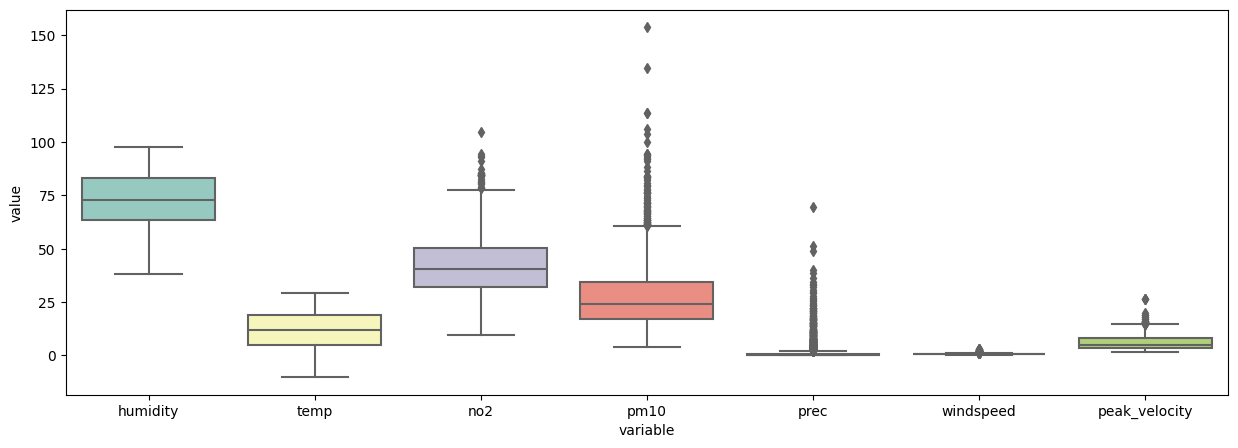

In [12]:
data1519melted = data1519.drop(columns=["day_type"]).melt()
fig, ax = plt.subplots(figsize=(15,5))

sns.boxplot(x='variable', y='value', data = data1519melted, palette="Set3")

plt.show()

## NO2 im Verhältnis zu anderen Daten

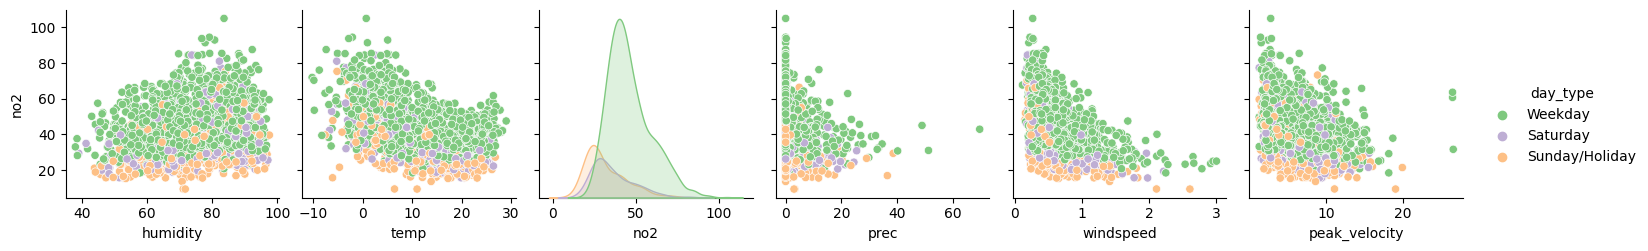

In [13]:
sns.pairplot(data1519.drop(columns=['pm10']), y_vars = 'no2', hue="day_type", palette="Accent")
plt.show()

### Beobachtungen

- bei hoher Luftfeutchtigkeit steigt NO2
- bei niedrigen Temperaturen steigt NO2
- hohe Niederschlag senkt NO2
- starke Windbewegungen erhöhen NO2

## Bestehen lineare Zusammenhänge auf Grundlage von PearsonR?

"Pearson's Korrelationskoeffizient (R) ist ein Maß für die lineare Korrelation zwischen zwei Variablen. Er variiert zwischen -1 und +1, wobei +1 eine perfekte positive Korrelation, -1 eine perfekte negative Korrelation und 0 keine Korrelation bedeutet. Hier ist eine allgemeine Richtlinie, um die Stärke der Korrelation basierend auf dem Wert von R zu interpretieren:

    Sehr schwach: ∣R∣<0.2∣R∣<0.2
    Schwach: 0.2≤∣R∣<0.40.2≤∣R∣<0.4
    Moderat: 0.4≤∣R∣<0.60.4≤∣R∣<0.6
    Stark: 0.6≤∣R∣<0.80.6≤∣R∣<0.8
    Sehr stark: ∣R∣≥0.8∣R∣≥0.8

Unter Verwendung dieser Richtlinien können wir die von Ihnen bereitgestellten Pearson-Korrelationswerte wie folgt interpretieren:

    no2_R_humidity: 0.219 - Eine schwache positive Korrelation zwischen Stickstoffdioxid (NO2) und Luftfeuchtigkeit.

    pm10_R_humidity: 0.289 - Ebenfalls eine schwache positive Korrelation zwischen Feinstaub (PM10) und Luftfeuchtigkeit.

    no2_R_temp: -0.513 - Eine moderate negative Korrelation zwischen NO2 und Temperatur.

    pm10_R_temp: -0.487 - Eine moderate negative Korrelation zwischen PM10 und Temperatur.

    no2_R_prec: -0.161 - Eine sehr schwache negative Korrelation zwischen NO2 und Niederschlag.

    pm10_R_prec: -0.224 - Eine schwache negative Korrelation zwischen PM10 und Niederschlag.

    no2_R_windspeed: -0.411 - Eine moderate negative Korrelation zwischen NO2 und Windgeschwindigkeit.

    pm10_R_windspeed: -0.378 - Eine schwache bis moderate negative Korrelation zwischen PM10 und Windgeschwindigkeit.

    no2_R_peak_velocity: -0.333 - Eine schwache bis moderate negative Korrelation zwischen NO2 und Spitzenwindgeschwindigkeit.

    pm10_R_peak_velocity: -0.384 - Eine schwache bis moderate negative Korrelation zwischen PM10 und Spitzenwindgeschwindigkeit.

Diese Werte deuten darauf hin, dass es einige lineare Abhängigkeiten zwischen den gemessenen Variablen gibt, aber keine davon ist besonders stark. Die stärksten linearen Zusammenhänge sind negativ und existieren zwischen der Temperatur und den Schadstoffkonzentrationen von NO2 und PM10. Es ist wichtig zu beachten, dass ein Pearson-Korrelationskoeffizient nur lineare Zusammenhänge misst und keine kausalen Beziehungen impliziert. Nichtlineare Zusammenhänge oder Beziehungen, die durch viele verschiedene Variablen beeinflusst werden, können mit diesem Koeffizienten nicht vollständig erfasst werden."

## PM10 im Verhältnis zu anderen Daten

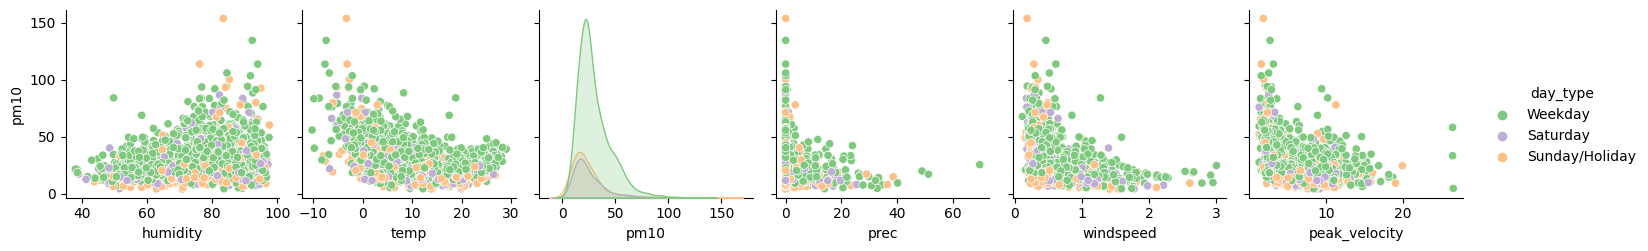

In [14]:
sns.pairplot(data1519.drop(columns=['no2']), y_vars = 'pm10', hue="day_type", palette="Accent")
plt.show()

### Beobachtungen

- die Beobachtungen für PM10 ähneln denen von NO2

## Beobachtungen überprüft mit einer Korrelationsmatrix

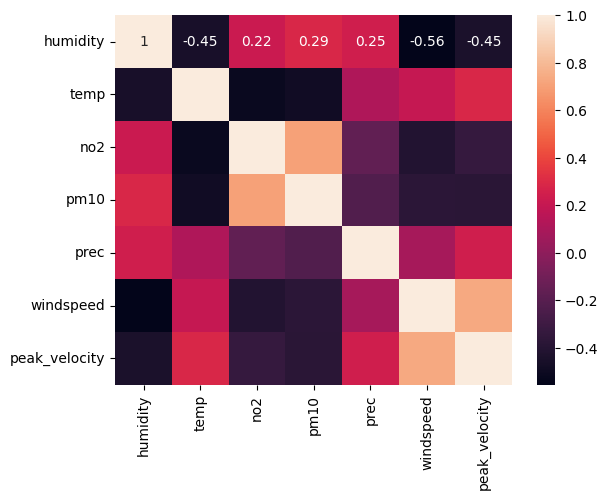

In [15]:
data1519nodaytype = data1519.drop(columns=['day_type'])
correlation_matrix = data1519nodaytype.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

### Ergebnisse

- hohe Luftfeuchtigkeit zeigt einen positiven Zusammenhang mit NO2
- dasselbe gilt für PM10

### Alternative Plots

In [16]:
import seaborn.objects as so

In [17]:
potential_predictors = [e for e in data1519.columns.tolist() if e not in ["pm10", "no2"]]

In [18]:
from matplotlib import style

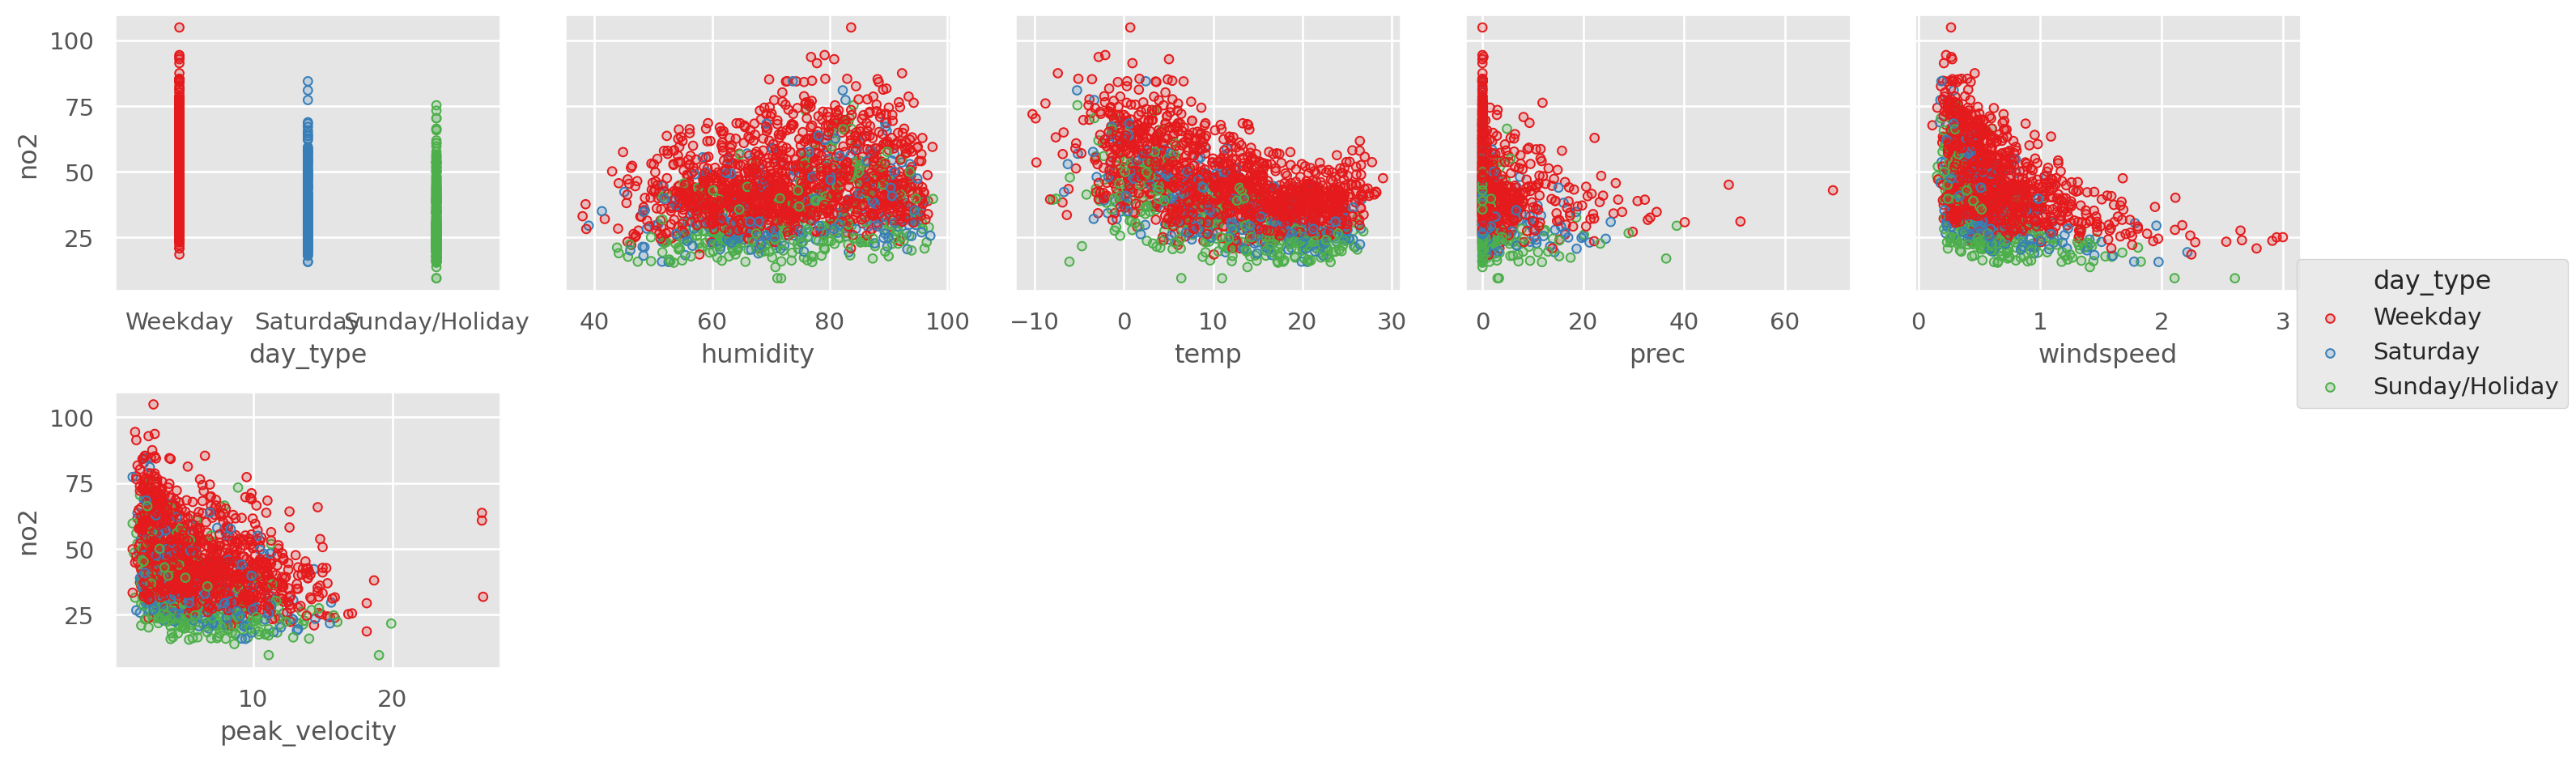

In [19]:
so.Plot(data1519, y="no2", color="day_type").pair(x = potential_predictors, wrap=5).add(so.Dots()).layout(size=(15,5)).scale(color="Set1").theme({**style.library["ggplot"]})

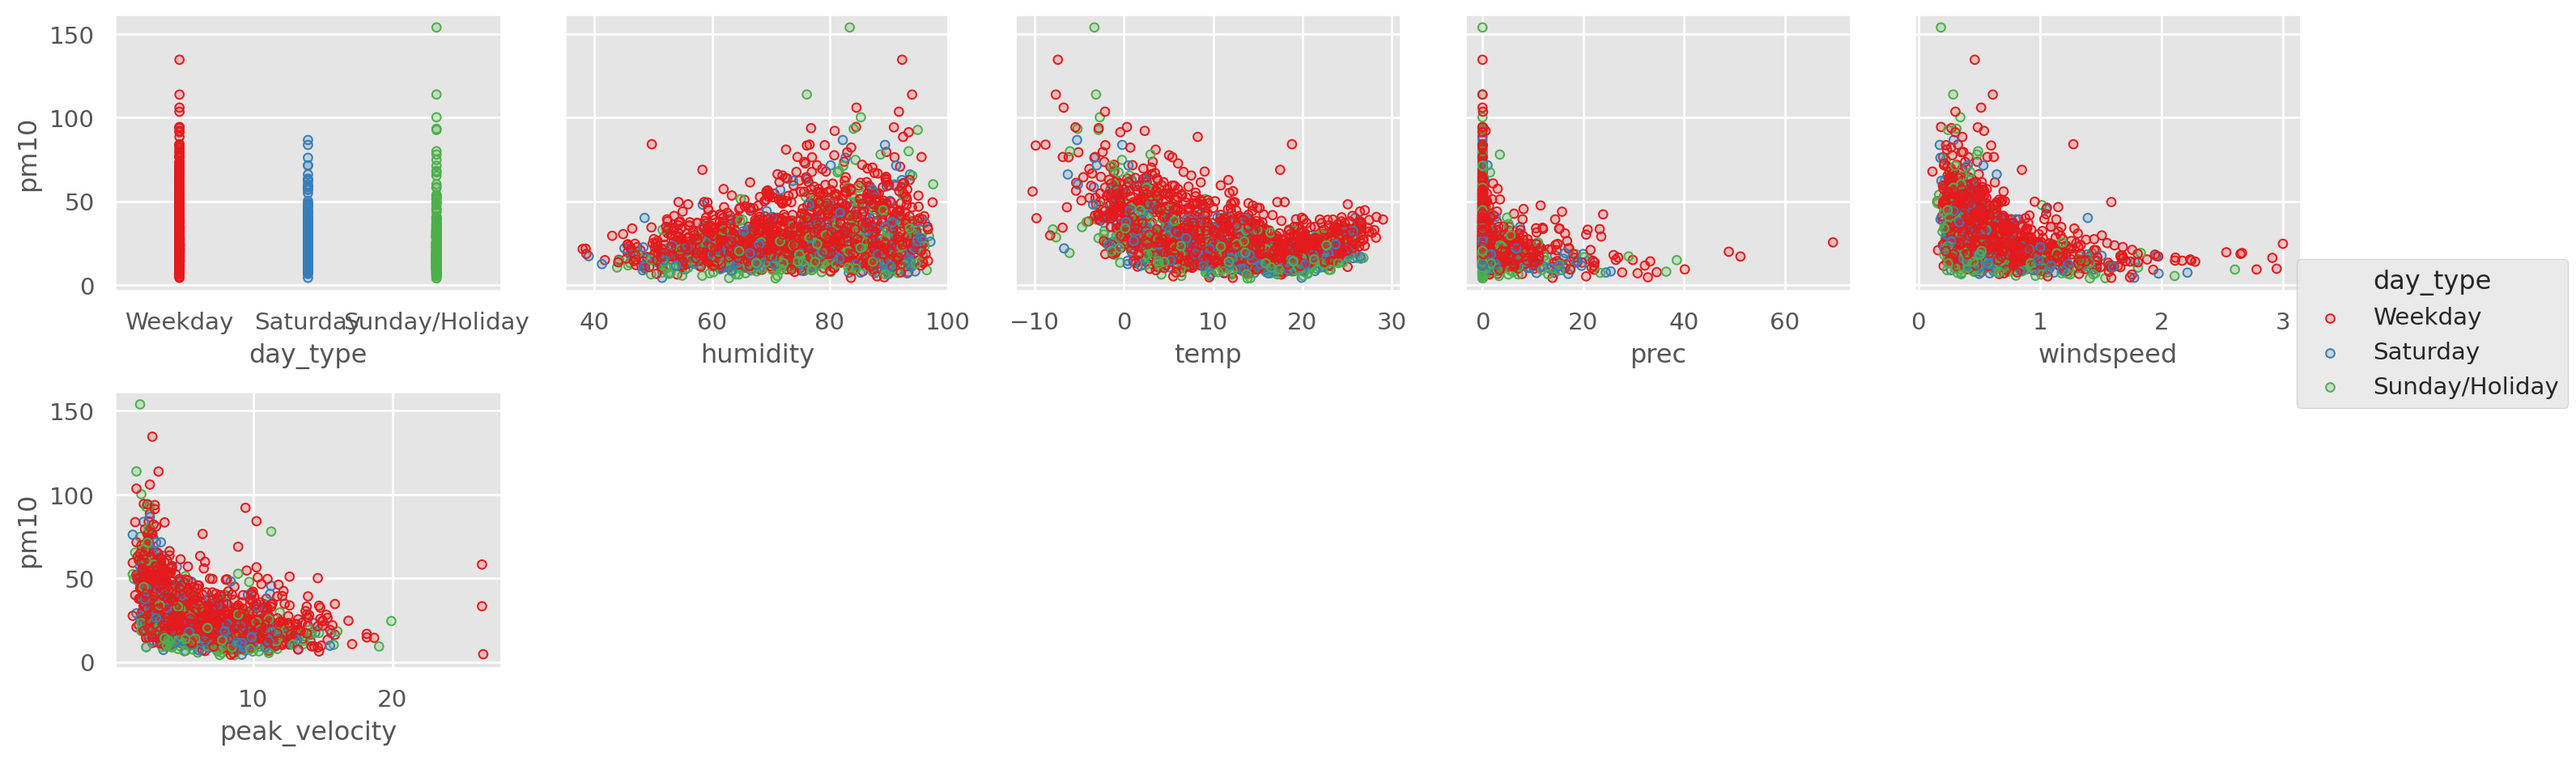

In [20]:
so.Plot(data1519, y="pm10", color="day_type").pair(x = potential_predictors, wrap=5).add(so.Dots()).layout(size=(15,5)).scale(color="Set1").theme({**style.library["ggplot"]})

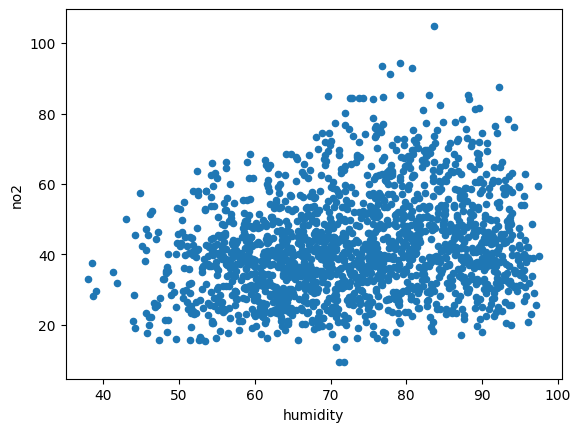

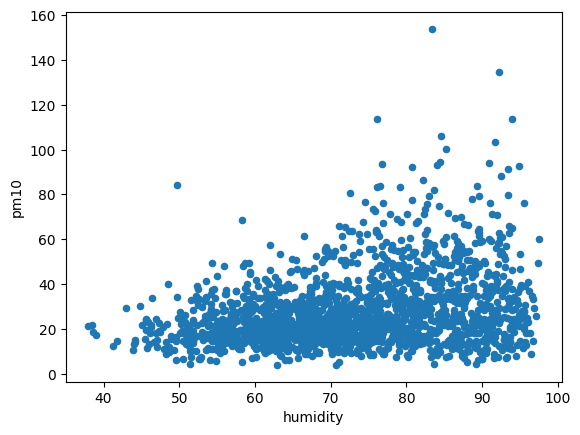

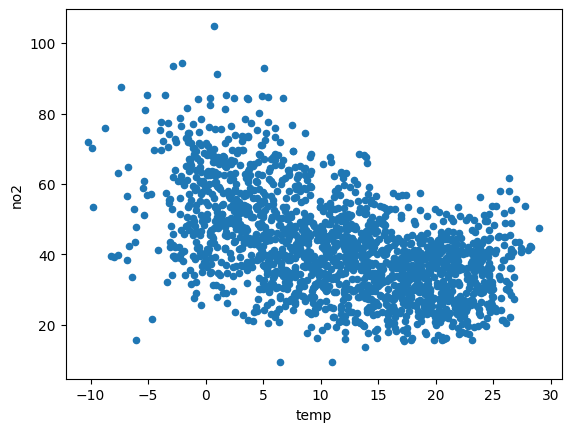

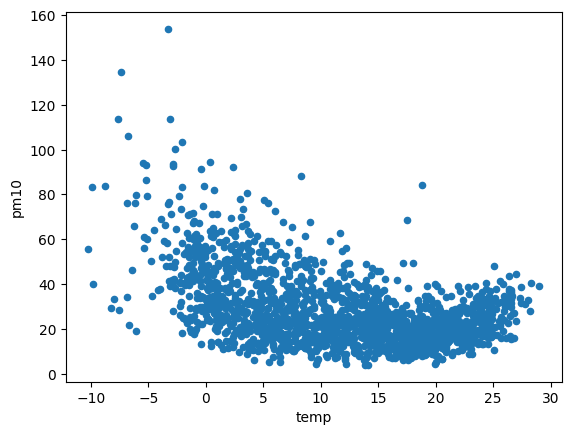

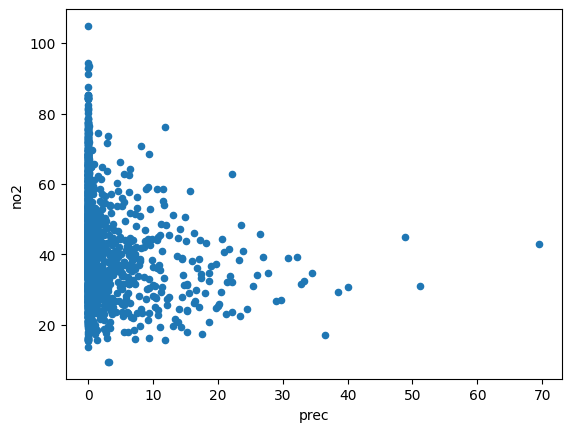

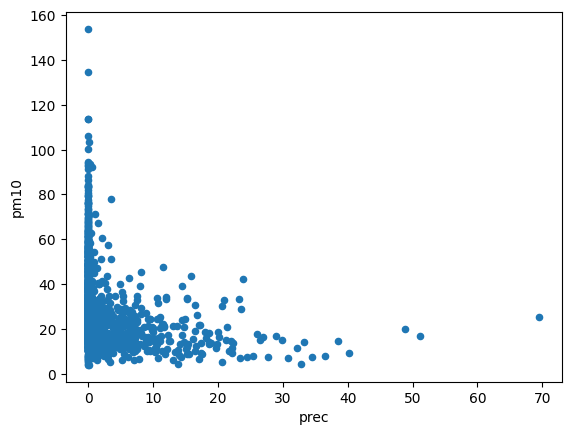

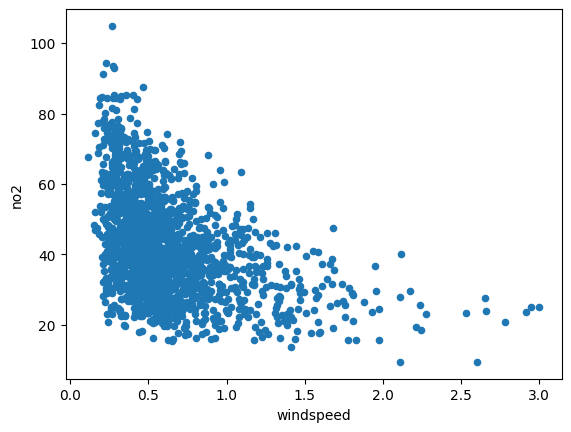

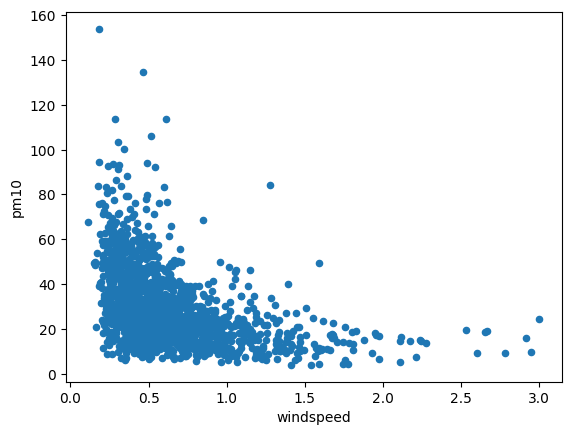

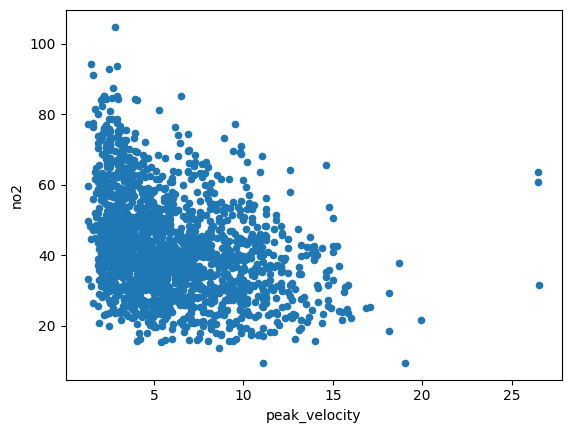

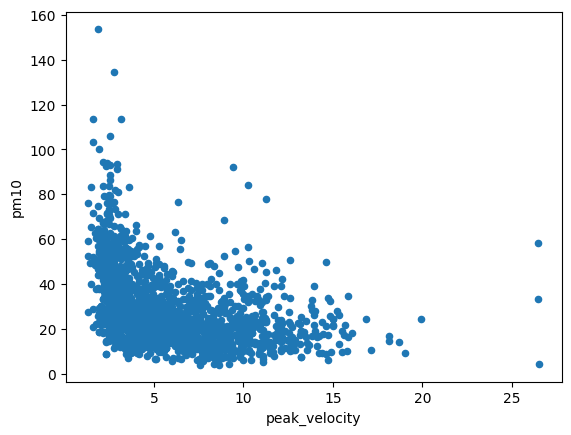

In [21]:
# Scatterplots für no2 und pm10 mit allen anderen Variablen
for column in data1519.columns.drop(['no2', 'pm10', 'day_type']):
    data1519.plot(kind='scatter', x=column, y='no2')
    data1519.plot(kind='scatter', x=column, y='pm10')

Die Niederschlagswerte (prec) sowie die Windwerte (windspeed und peak_velocity) sehen eher nicht nach einem linearen Zusammenhang mit NO2 und PM10 aus.

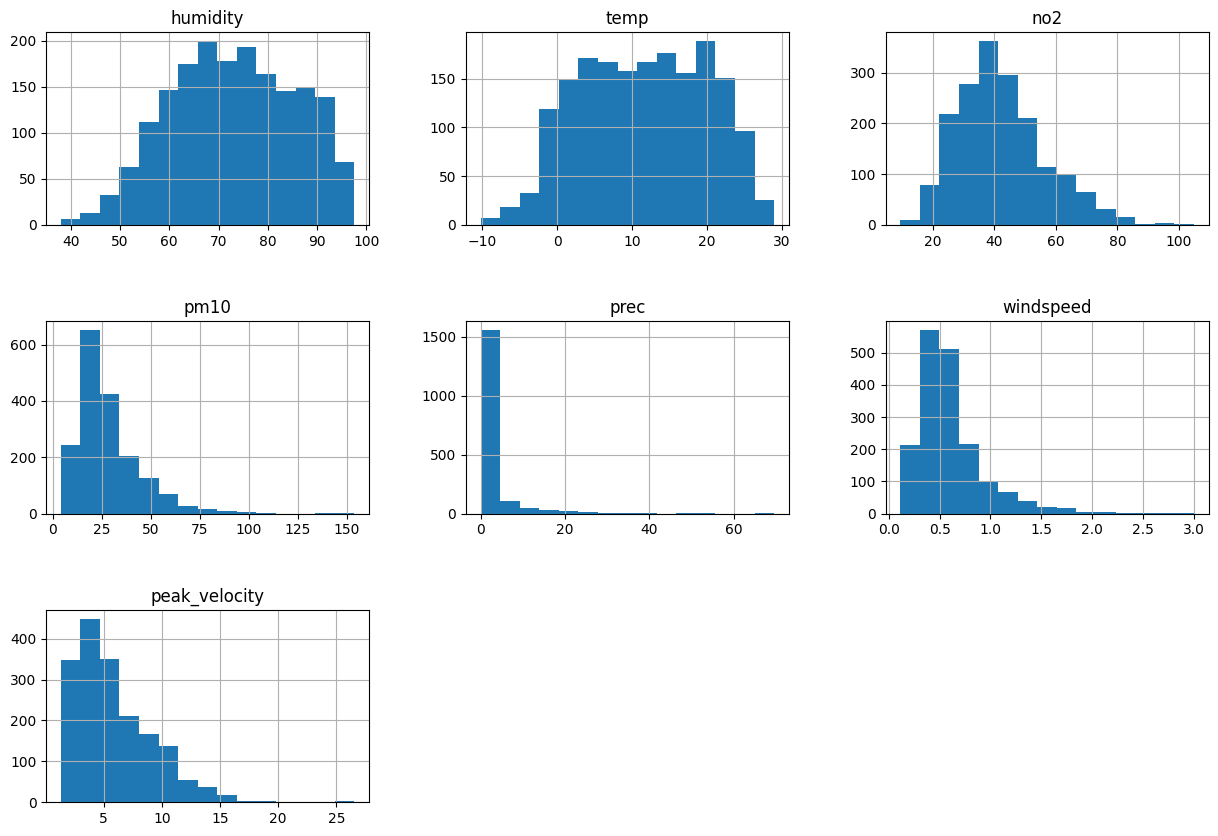

In [22]:
data1519.hist(bins=15, figsize=(15, 10))
plt.subplots_adjust(hspace=0.5)
plt.show()

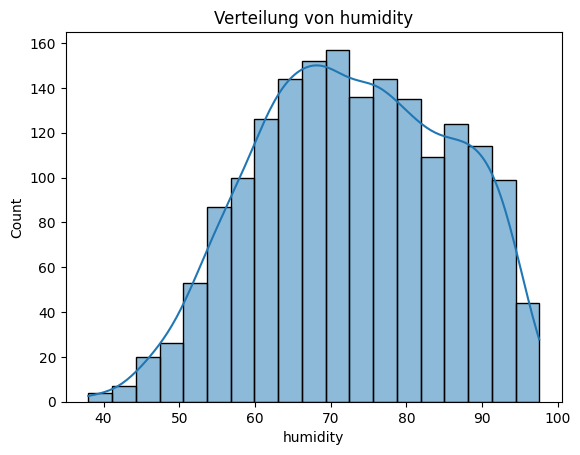

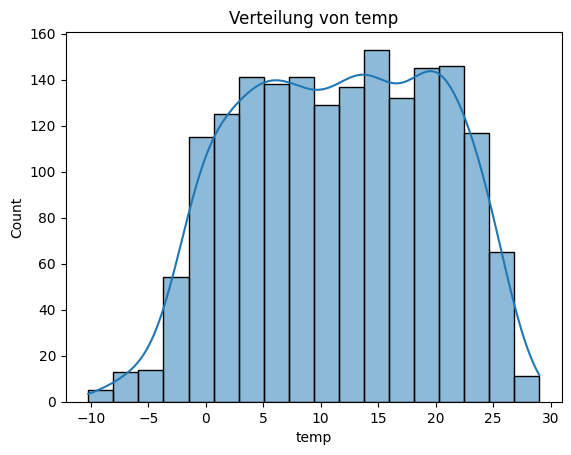

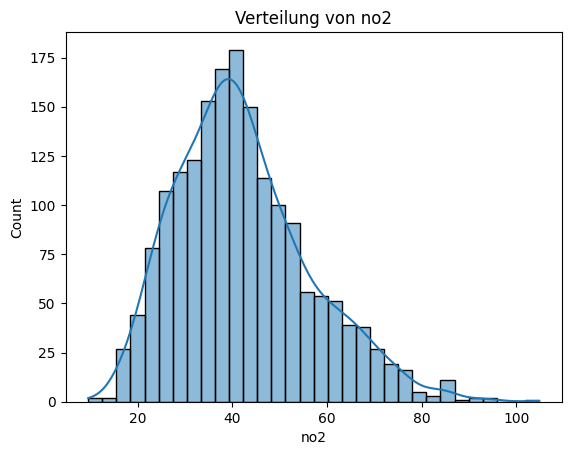

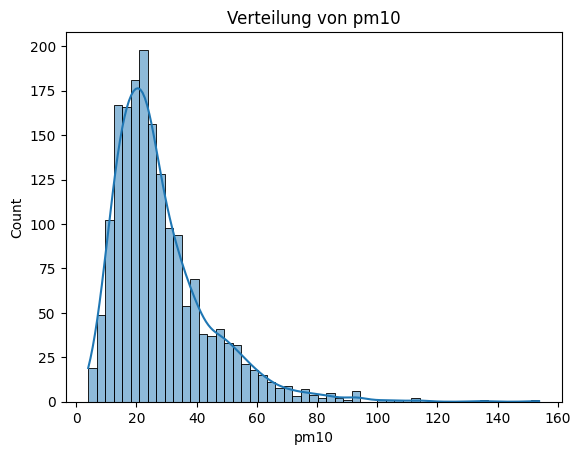

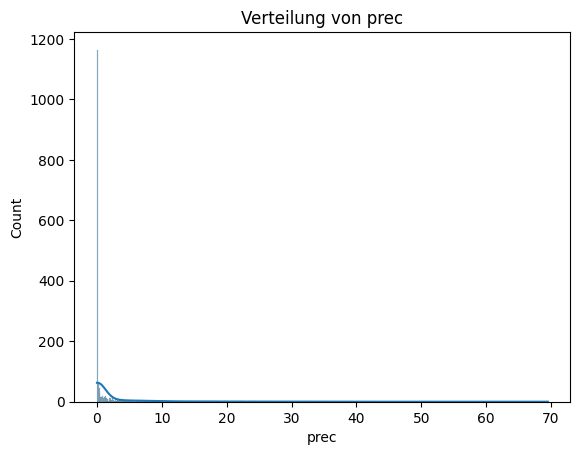

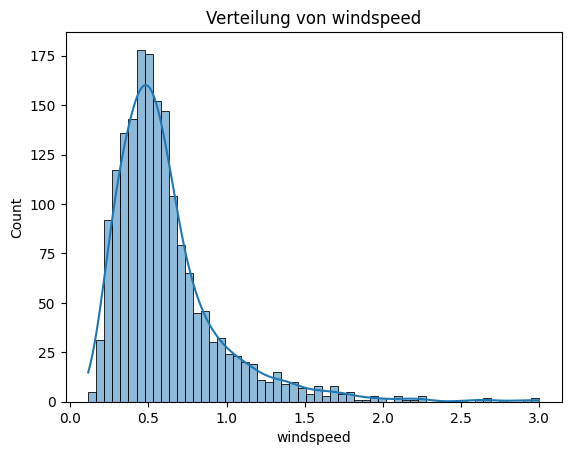

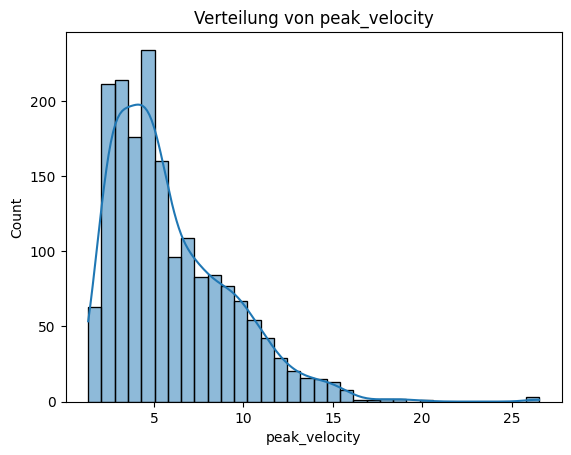

In [23]:
for column in data1519.select_dtypes(include=['float64']).columns:
    sns.histplot(data1519[column], kde=True)
    plt.title(f'Verteilung von {column}')
    plt.show()

## Mittelwertbetrachtungen über die Zeit

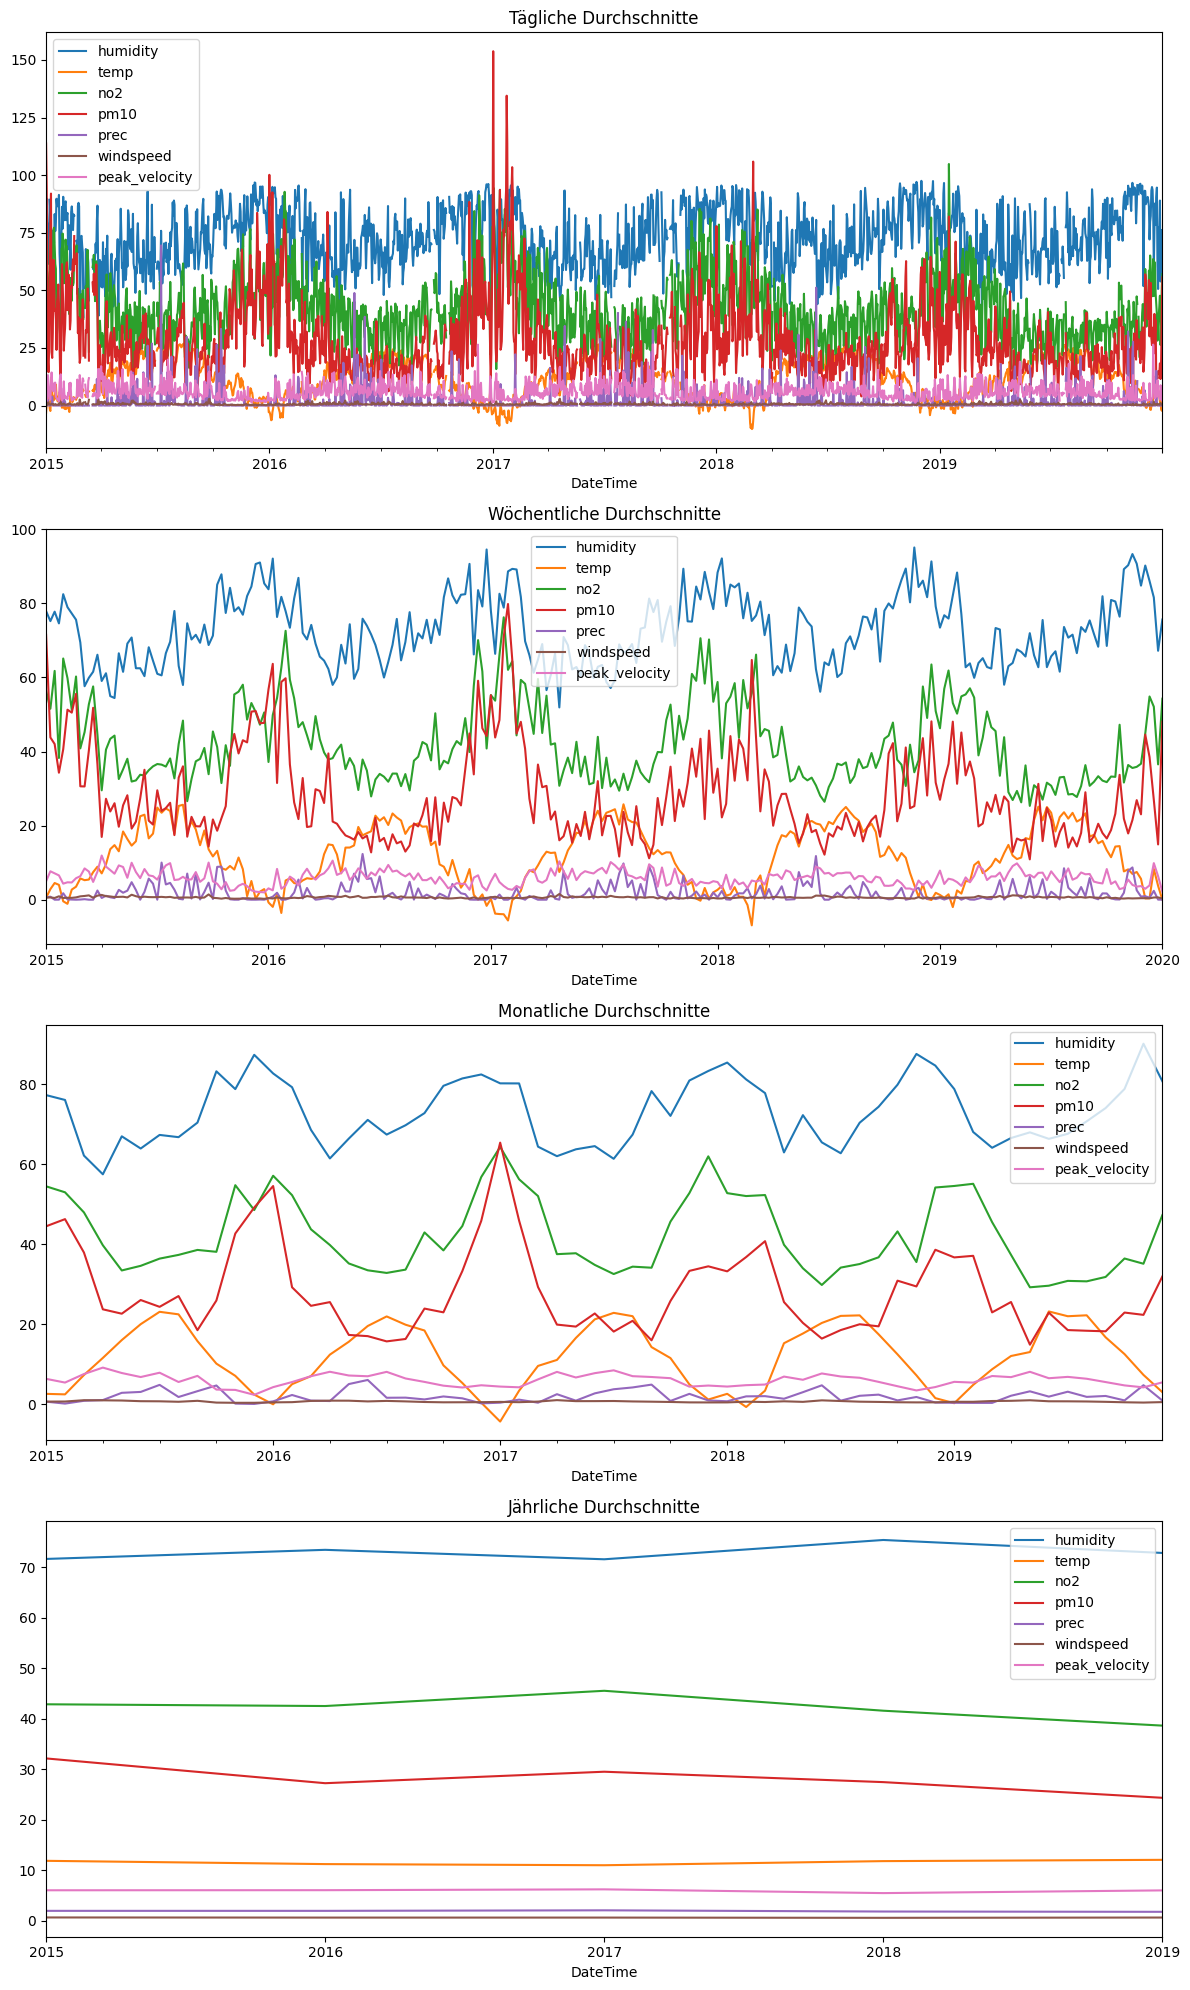

In [24]:
# Tagesmittelwerte (wenn Daten stündlich oder minutengenau sind)
daily_means = data1519nodaytype.resample('D').mean()

# Wöchentliche Mittelwerte
weekly_means = data1519nodaytype.resample('W').mean()

# Monatliche Mittelwerte
monthly_means = data1519nodaytype.resample('M').mean()

# Jährliche Mittelwerte
annual_means = data1519nodaytype.resample('A').mean()

# Erstellen Sie Zeitreihendiagramme für jede Zeitskala
fig, axes = plt.subplots(4, 1, figsize=(12, 20))
daily_means.plot(ax=axes[0], title='Tägliche Durchschnitte')
weekly_means.plot(ax=axes[1], title='Wöchentliche Durchschnitte')
monthly_means.plot(ax=axes[2], title='Monatliche Durchschnitte')
annual_means.plot(ax=axes[3], title='Jährliche Durchschnitte')
plt.tight_layout()
plt.show()


# 2. Erstellen Sie ein erstes Modell für pm10 und no2 mit Ihren Daten. Wir sieht das Modell aus? Evaluieren Sie und überlegen Sie, ob Verbesserungen gut wären! Wie sieht es diagnostisch aus? Welche Prädiktoren sind sinnvoll? (ANOVA! 𝑅2!)

## Erstellen der Modelle für pm10 und no2

Alle Daten außer no2 und pm10 sollen Prädiktoren sein.

"Wir wollen Schadstoffe unabhängig von einander betrachten, daher die Responses nicht als Prädiktoren im jeweils anderen Modell verwenden. Also no2 ist kein Prädiktor in dem Modell für pm10 und umgekehrt."

In [25]:
predictor = data1519.drop(columns=['no2', 'pm10'])

### NO2 Modell

In [26]:
no2_model = smf.ols("no2 ~ humidity + temp + prec + windspeed + peak_velocity + C(day_type)", data=data1519).fit()

print(no2_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    no2   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     381.0
Date:                Mon, 29 Jan 2024   Prob (F-statistic):               0.00
Time:                        09:16:59   Log-Likelihood:                -6434.5
No. Observations:                1781   AIC:                         1.288e+04
Df Residuals:                    1773   BIC:                         1.293e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [27]:
sm.stats.anova_lm(no2_model, typ=2)

sum_sq      df            F         PR(>F)
C(day_type)     68180.143991     2.0   421.775782  1.456370e-150
humidity        13246.483471     1.0   163.890705   5.926548e-36
temp            82021.284636     1.0  1014.799601  1.788411e-176
prec               15.710697     1.0     0.194379   6.593505e-01
windspeed       39250.686146     1.0   485.624930   2.557945e-95
peak_velocity    1119.034036     1.0    13.845129   2.046974e-04
Residual       143302.911784  1773.0          NaN            NaN

In [28]:
from plot_utility import Linear_Reg_Diagnostic

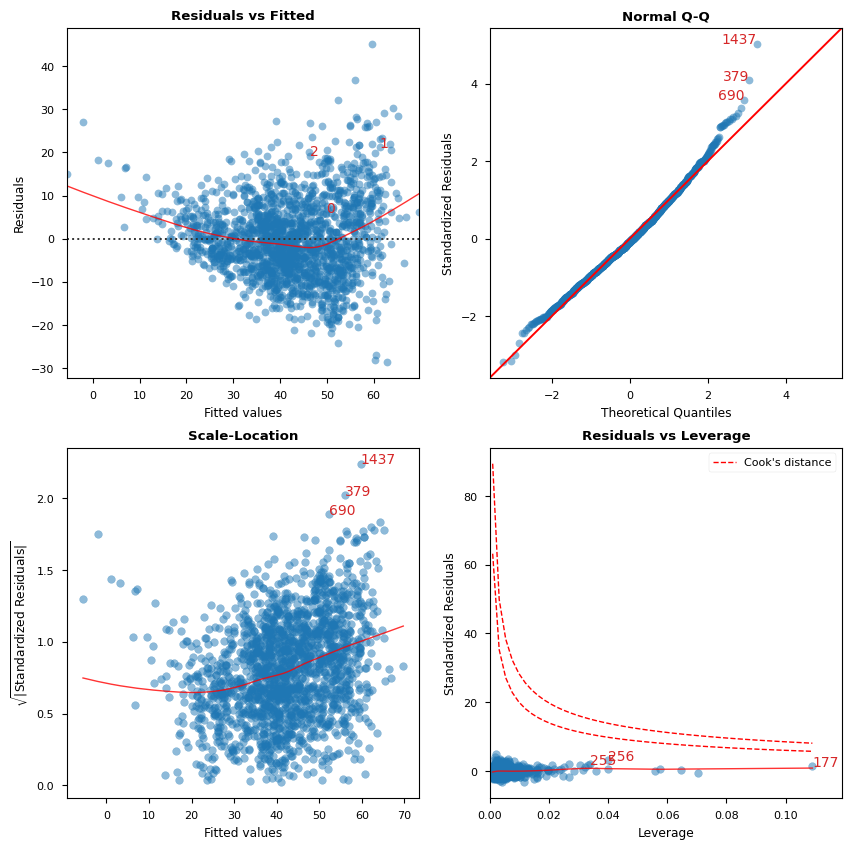

                        Features  VIF Factor
1        C(day_type)[T.Saturday]        1.04
2  C(day_type)[T.Sunday/Holiday]        1.04
5                           prec        1.35
4                           temp        1.40
3                       humidity        2.19
7                  peak_velocity        2.44
6                      windspeed        2.62
0                      Intercept      117.10


In [29]:
diagnostics = Linear_Reg_Diagnostic(no2_model)
diagnostics()
plt.show()

In [30]:
data1519["no2_fit"] = no2_model.fittedvalues

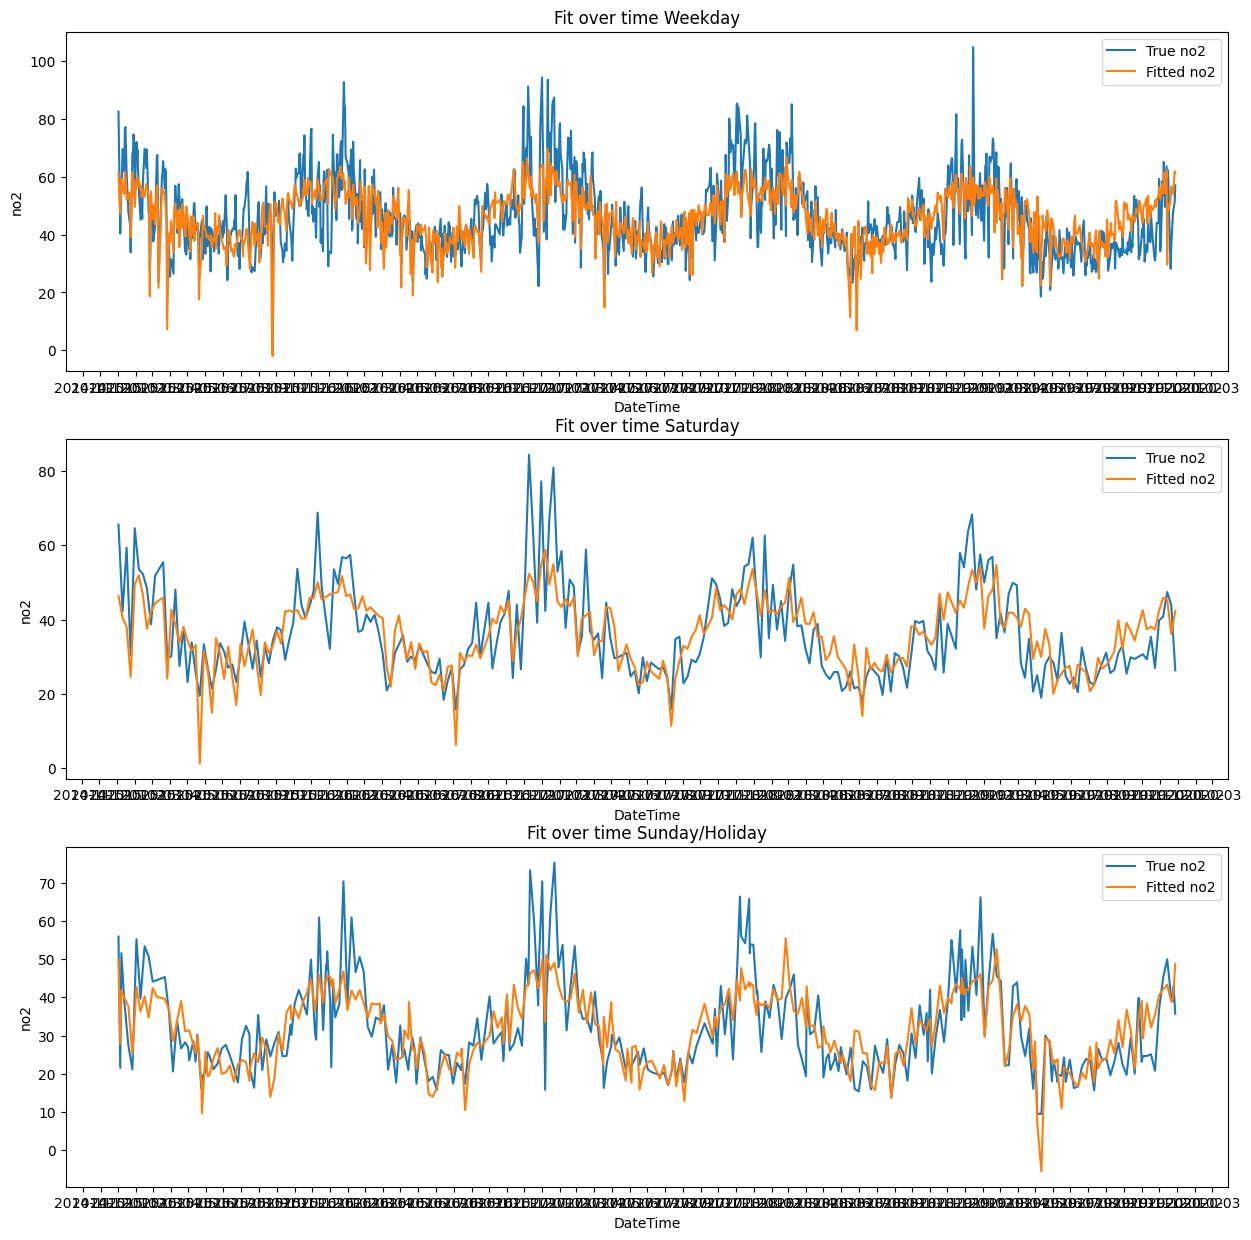

In [31]:
fig, ax = plt.subplots(3, 1, figsize=(15,15))

sns.lineplot(data=data1519[data1519["day_type"] == "Weekday"], x="DateTime", y="no2", ax=ax[0], label="True no2")
sns.lineplot(data=data1519[data1519["day_type"] == "Weekday"], x="DateTime", y="no2_fit", ax=ax[0], label="Fitted no2")
sns.scatterplot(data=data1519[(data1519["day_type"] == "Weekday") & (data1519["temp"] == 0)], x="DateTime", y="no2", ax=ax[0], color="red")
ax[0].set_title("Fit over time Weekday")
ax[0].xaxis.set_major_locator(mdates.MonthLocator(interval=1))

sns.lineplot(data=data1519[data1519["day_type"] == "Saturday"], x="DateTime", y="no2", ax=ax[1], label="True no2")
sns.lineplot(data=data1519[data1519["day_type"] == "Saturday"], x="DateTime", y="no2_fit", ax=ax[1], label="Fitted no2")
sns.scatterplot(data=data1519[(data1519["day_type"] == "Saturday") & (data1519["temp"] == 0)], x="DateTime", y="no2", ax=ax[1], color="red")
ax[1].set_title("Fit over time Saturday")
ax[1].xaxis.set_major_locator(mdates.MonthLocator(interval=1))

sns.lineplot(data=data1519[data1519["day_type"] == "Sunday/Holiday"], x="DateTime", y="no2", ax=ax[2], label="True no2")
sns.lineplot(data=data1519[data1519["day_type"] == "Sunday/Holiday"], x="DateTime", y="no2_fit", ax=ax[2], label="Fitted no2")
sns.scatterplot(data=data1519[(data1519["day_type"] == "Sunday/Holiday") & (data1519["temp"] == 0)], x="DateTime", y="no2", ax=ax[2], color="red")
ax[2].set_title("Fit over time Sunday/Holiday")
ax[2].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax[2].legend()

plt.show()

### PM10 Modell

In [32]:
pm10_model = smf.ols("pm10 ~ humidity + temp + prec + windspeed + peak_velocity + C(day_type)", data=data1519).fit()

print(pm10_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   pm10   R-squared:                       0.378
Model:                            OLS   Adj. R-squared:                  0.375
Method:                 Least Squares   F-statistic:                     153.9
Date:                Mon, 29 Jan 2024   Prob (F-statistic):          1.12e-177
Time:                        09:17:01   Log-Likelihood:                -7063.4
No. Observations:                1781   AIC:                         1.414e+04
Df Residuals:                    1773   BIC:                         1.419e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [33]:
sm.stats.anova_lm(pm10_model, typ=2)

sum_sq      df           F        PR(>F)
C(day_type)     15944.034062     2.0   48.673327  2.638434e-21
humidity          387.824390     1.0    2.367870  1.240343e-01
temp            59837.530639     1.0  365.339372  3.368174e-74
prec             5930.034282     1.0   36.205956  2.151801e-09
windspeed       13297.885686     1.0   81.190536  5.165528e-19
peak_velocity     553.699501     1.0    3.380625  6.613422e-02
Residual       290392.850816  1773.0         NaN           NaN

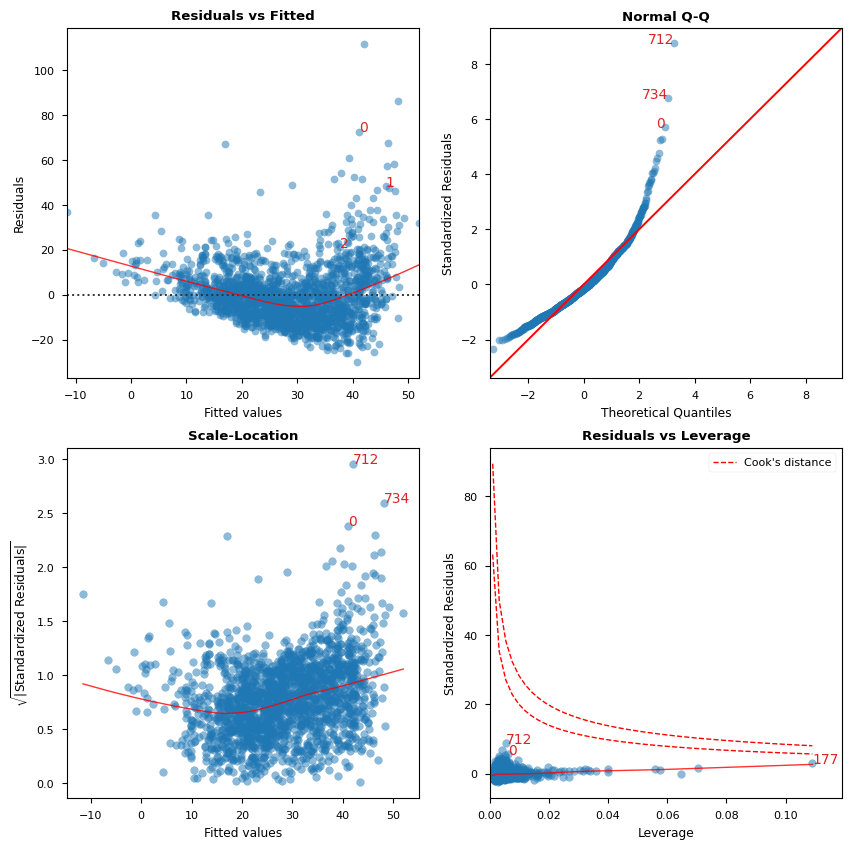

                        Features  VIF Factor
1        C(day_type)[T.Saturday]        1.04
2  C(day_type)[T.Sunday/Holiday]        1.04
5                           prec        1.35
4                           temp        1.40
3                       humidity        2.19
7                  peak_velocity        2.44
6                      windspeed        2.62
0                      Intercept      117.10


In [34]:
diagnostics = Linear_Reg_Diagnostic(pm10_model)
diagnostics()
plt.show()

Für PM10 Werte ist Q-Q Analyse relativ schlecht, für NO2 ziemlich gut.

In [35]:
data1519["pm10_fit"] = pm10_model.fittedvalues

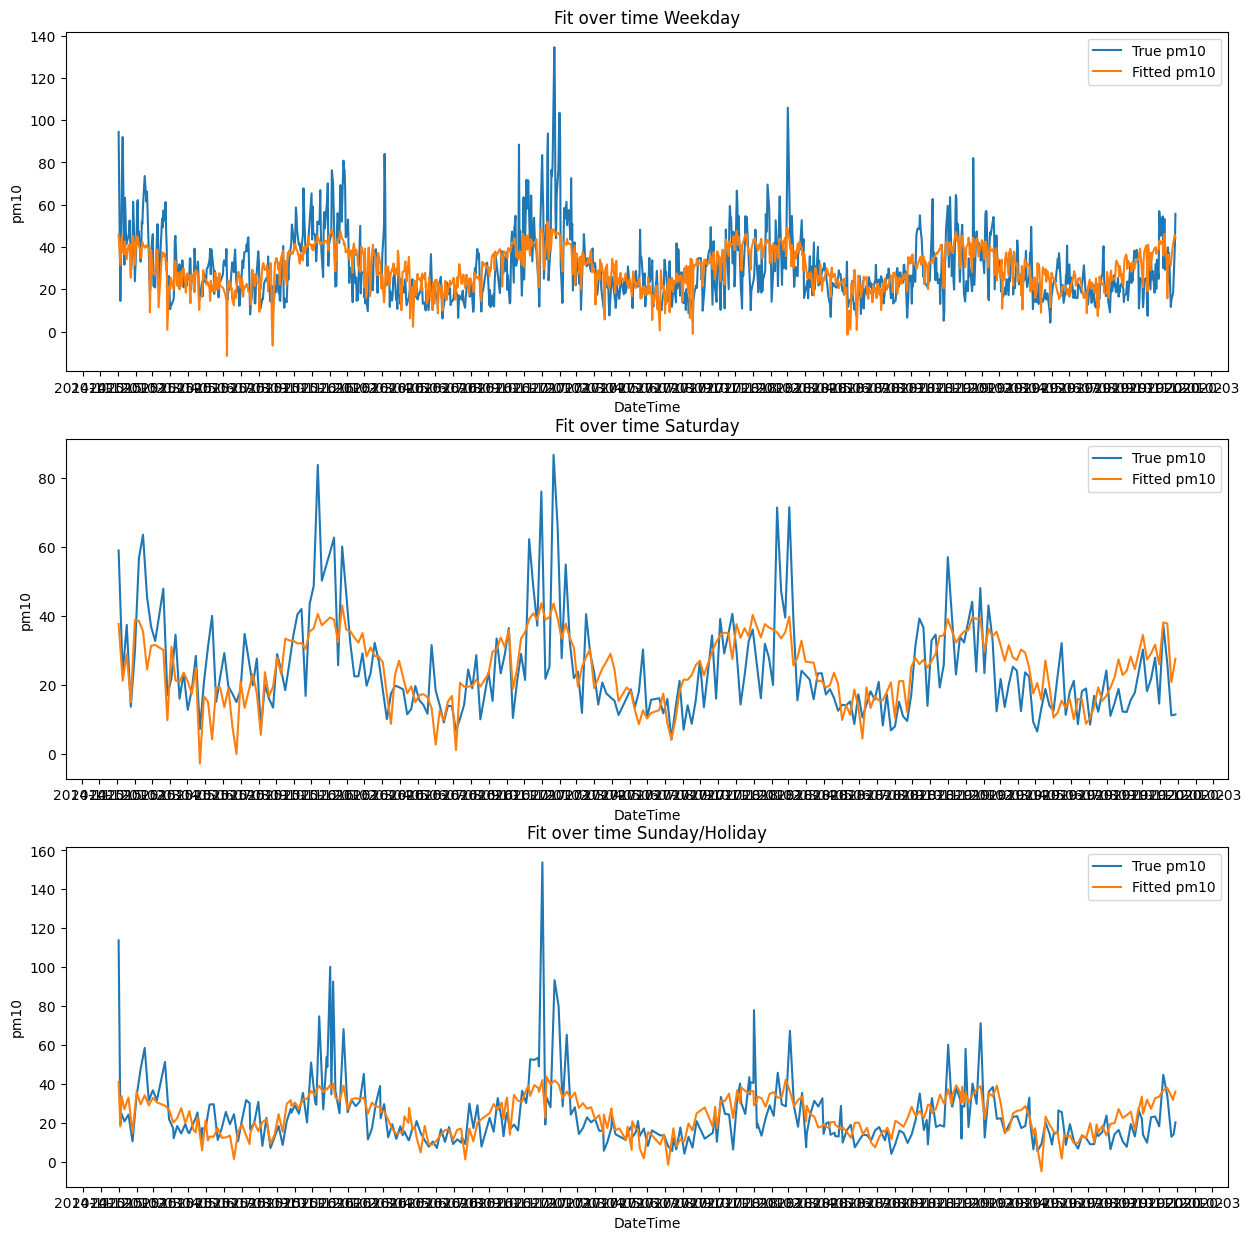

In [36]:
fig, ax = plt.subplots(3, 1, figsize=(15,15))

sns.lineplot(data=data1519[data1519["day_type"] == "Weekday"], x="DateTime", y="pm10", ax=ax[0], label="True pm10")
sns.lineplot(data=data1519[data1519["day_type"] == "Weekday"], x="DateTime", y="pm10_fit", ax=ax[0], label="Fitted pm10")
sns.scatterplot(data=data1519[(data1519["day_type"] == "Weekday") & (data1519["temp"] == 0)], x="DateTime", y="pm10", ax=ax[0], color="red")
ax[0].set_title("Fit over time Weekday")
ax[0].xaxis.set_major_locator(mdates.MonthLocator(interval=1))

sns.lineplot(data=data1519[data1519["day_type"] == "Saturday"], x="DateTime", y="pm10", ax=ax[1], label="True pm10")
sns.lineplot(data=data1519[data1519["day_type"] == "Saturday"], x="DateTime", y="pm10_fit", ax=ax[1], label="Fitted pm10")
sns.scatterplot(data=data1519[(data1519["day_type"] == "Saturday") & (data1519["temp"] == 0)], x="DateTime", y="pm10", ax=ax[1], color="red")
ax[1].set_title("Fit over time Saturday")
ax[1].xaxis.set_major_locator(mdates.MonthLocator(interval=1))

sns.lineplot(data=data1519[data1519["day_type"] == "Sunday/Holiday"], x="DateTime", y="pm10", ax=ax[2], label="True pm10")
sns.lineplot(data=data1519[data1519["day_type"] == "Sunday/Holiday"], x="DateTime", y="pm10_fit", ax=ax[2], label="Fitted pm10")
sns.scatterplot(data=data1519[(data1519["day_type"] == "Sunday/Holiday") & (data1519["temp"] == 0)], x="DateTime", y="pm10", ax=ax[2], color="red")
ax[2].set_title("Fit over time Sunday/Holiday")
ax[2].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax[2].legend()

plt.show()

# 3. Finden Sie heraus, was Inversion in einem meteorologischen Zusammenhang bedeutet und wie es sich auf Luftverschmutzung auswirken kann. Sie haben Daten aus einer Wetterstation in Kalkleiten bekommen. Ermitteln Sie die Differenz der Temperaturen zwischen der Station in Graz - der Station in Kalkleiten und fügen Sie diese Variable zu Ihrem Modell hinzu. Hilft das?

## Inversion in einem meterologischen Zusammenhang

"Unter Inversion versteht man in der Meteorologie die Umkehr des normalerweise mit der Höhe abnehmenden Temperaturverlaufs in einer mehr oder weniger dicken Schicht.

Inversionen können durch großräumige Advektion von Warmluft oder durch Absinkvorgänge in der entsprechenden Höhe sowie durch Abkühlung der unteren Luftschichten entstehen.

Vom Erdboden aufsteigende Warmluftblasen können eine solche Inversionsschicht nicht durchdringen. Somit stellt eine Inversion eine Sperrschicht dar, die einen Austausch zwischen tief liegenden und höher liegenden Luftschichten verhindert. Eine Inversion wirkt in der Atmosphäre stabilisierend.

Inversionen begünstigen die Bildung von Smog. Inversionswetterlagen sind insbesondere in industriell ausgerichteten Ballungsräumen gefürchtet, da sich die Luftschichten nicht durchmischen und sich somit innerhalb der Inversionsschicht die Luft mit Schadstoffen anreichern kann." [1]

"Eine Inversionswetterlage, auch Umkehrwetterlage, ist eine Wetterlage, die durch eine Umkehr (lateinisch: inversio) des üblichen vertikalen Temperaturgradienten in der Atmosphäre geprägt ist: Die oberen Luftschichten sind hierbei wärmer als die unteren. Der Bereich, in dem diese Inversion auftritt, wird als Inversionsschicht bezeichnet. 

Normalerweise nimmt die Lufttemperatur mit steigender Höhe ab, da sich die bodennahe Luft durch den Kontakt mit dem Erdboden erwärmt, während höherliegende Luftschichten Strahlungswärme an den Weltraum verlieren.

Wenn jedoch Rauchgase aus Heizungsanlagen oder Autoabgase bei Windstille zu erhöhten Staub­konzentrationen in den über Siedlungsgebieten liegenden Luftschichten führen, so filtert der Staub das Sonnenlicht und erwärmt die umgebende Luft. Vor allem im Winter kann die Staubkonzentration derart ansteigen, dass sich die betroffene Luftschicht über das Niveau der bodennahen Luft hinaus erwärmt und eine Inversionswetterlage entsteht.

Solange sich die Staubschicht durch die Sonneneinstrahlung ausreichend erwärmt und zugleich die übliche Erwärmung des Erdbodens reduziert, verbleibt die Inversionswetterlage. Die Situation kann sich dann oft erst durch aufkommenden Wind ändern." [2]

- Quellen: [1 Deutscher Wetterdienst](https://www.dwd.de/DE/service/lexikon/begriffe/I/Inversion.html) / [2 Wikipedia](https://de.wikipedia.org/wiki/Inversionswetterlage)

## Kalkleiten Wetterdaten in das vorhandene Datenset aufnehmen

In [37]:
datakalk = dailymeansdata["Kalkleiten"]
datakalk.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2192 entries, 2015-01-01 00:00:00+00:00 to 2020-12-31 00:00:00+00:00
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   day_type  2192 non-null   category
 1   temp      2171 non-null   float64 
dtypes: category(1), float64(1)
memory usage: 36.5 KB


In [38]:
datakalk.index

DatetimeIndex(['2015-01-01 00:00:00+00:00', '2015-01-02 00:00:00+00:00',
               '2015-01-03 00:00:00+00:00', '2015-01-04 00:00:00+00:00',
               '2015-01-05 00:00:00+00:00', '2015-01-06 00:00:00+00:00',
               '2015-01-07 00:00:00+00:00', '2015-01-08 00:00:00+00:00',
               '2015-01-09 00:00:00+00:00', '2015-01-10 00:00:00+00:00',
               ...
               '2020-12-22 00:00:00+00:00', '2020-12-23 00:00:00+00:00',
               '2020-12-24 00:00:00+00:00', '2020-12-25 00:00:00+00:00',
               '2020-12-26 00:00:00+00:00', '2020-12-27 00:00:00+00:00',
               '2020-12-28 00:00:00+00:00', '2020-12-29 00:00:00+00:00',
               '2020-12-30 00:00:00+00:00', '2020-12-31 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='DateTime', length=2192, freq=None)

In [39]:
datakalk1519 = datakalk[datakalk.index.year != 2020]

In [40]:
datakalk1519.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1826 entries, 2015-01-01 00:00:00+00:00 to 2019-12-31 00:00:00+00:00
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   day_type  1826 non-null   category
 1   temp      1807 non-null   float64 
dtypes: category(1), float64(1)
memory usage: 30.4 KB


In [41]:
merged_data = pd.merge(data1519, datakalk1519[['temp']], left_index=True, right_index=True, suffixes=('_data1519', '_datakalk1519'))

In [42]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1781 entries, 2015-01-01 00:00:00+00:00 to 2019-12-31 00:00:00+00:00
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   day_type           1781 non-null   category
 1   humidity           1781 non-null   float64 
 2   temp_data1519      1781 non-null   float64 
 3   no2                1781 non-null   float64 
 4   pm10               1781 non-null   float64 
 5   prec               1781 non-null   float64 
 6   windspeed          1781 non-null   float64 
 7   peak_velocity      1781 non-null   float64 
 8   no2_fit            1781 non-null   float64 
 9   pm10_fit           1781 non-null   float64 
 10  temp_datakalk1519  1762 non-null   float64 
dtypes: category(1), float64(10)
memory usage: 154.9 KB


In [43]:
merged_data['temp_diff'] = merged_data['temp_data1519'] - merged_data['temp_datakalk1519']
data1519['temp_diff'] = merged_data['temp_diff']
data1519.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1781 entries, 2015-01-01 00:00:00+00:00 to 2019-12-31 00:00:00+00:00
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   day_type       1781 non-null   category
 1   humidity       1781 non-null   float64 
 2   temp           1781 non-null   float64 
 3   no2            1781 non-null   float64 
 4   pm10           1781 non-null   float64 
 5   prec           1781 non-null   float64 
 6   windspeed      1781 non-null   float64 
 7   peak_velocity  1781 non-null   float64 
 8   no2_fit        1781 non-null   float64 
 9   pm10_fit       1781 non-null   float64 
 10  temp_diff      1762 non-null   float64 
dtypes: category(1), float64(10)
memory usage: 154.9 KB


### NO2 Modell updaten mit neuen Daten

In [44]:
no2_model_diff = smf.ols("no2 ~ humidity + temp_diff + prec + windspeed + peak_velocity + C(day_type)", data=data1519).fit()

print(no2_model_diff.summary())

                            OLS Regression Results                            
Dep. Variable:                    no2   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     362.2
Date:                Mon, 29 Jan 2024   Prob (F-statistic):               0.00
Time:                        09:17:04   Log-Likelihood:                -6390.8
No. Observations:                1762   AIC:                         1.280e+04
Df Residuals:                    1754   BIC:                         1.284e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [45]:
sm.stats.anova_lm(no2_model_diff, typ=2)

sum_sq      df           F         PR(>F)
C(day_type)     75283.511632     2.0  452.664613  3.081855e-159
humidity          309.342050     1.0    3.720023   5.392482e-02
temp_diff       77578.443296     1.0  932.927151  1.163151e-164
prec              830.288158     1.0    9.984711   1.605384e-03
windspeed        3560.164775     1.0   42.813109   7.881801e-11
peak_velocity     276.511892     1.0    3.325221   6.839497e-02
Residual       145855.535825  1754.0         NaN            NaN

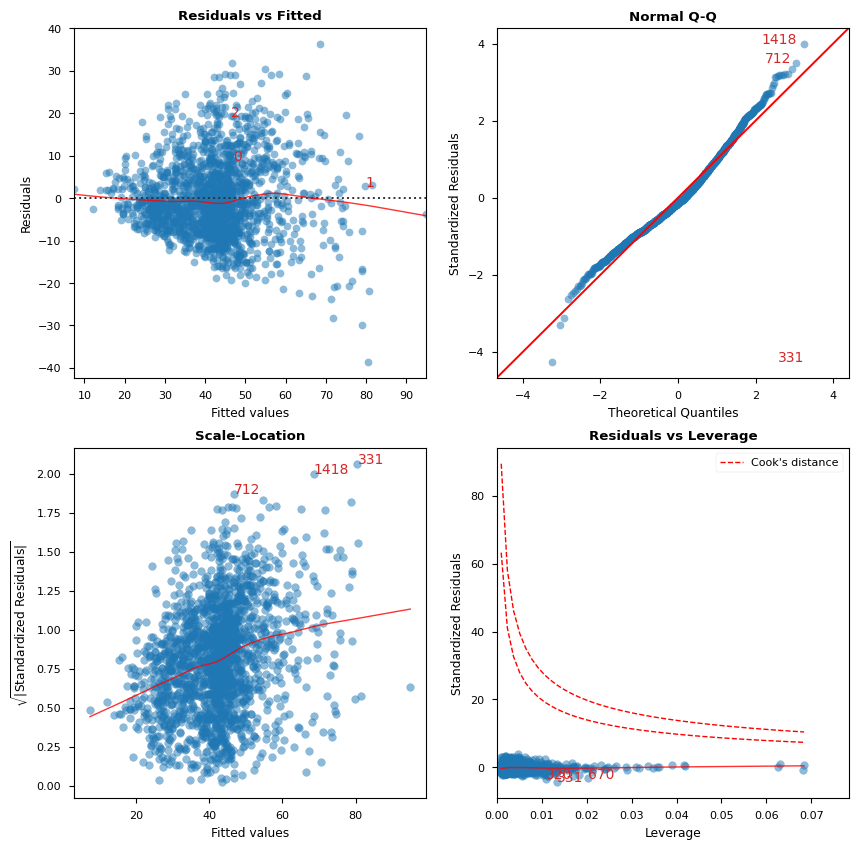

                        Features  VIF Factor
1        C(day_type)[T.Saturday]        1.04
2  C(day_type)[T.Sunday/Holiday]        1.04
5                           prec        1.33
4                      temp_diff        1.33
3                       humidity        1.77
7                  peak_velocity        2.41
6                      windspeed        2.75
0                      Intercept       86.38


In [46]:
diagnostics = Linear_Reg_Diagnostic(no2_model_diff)
diagnostics()
plt.show()

### Testweise die Prädiktoren mit einem relativen hohen P-Value entfernen und die Modelle vergleichen.

- humidity 	5.392482e-02
- prec 	    1.605384e-03
- peak_velocity 	6.839497e-02

In [47]:
no2_model_diff_smaller = smf.ols("no2 ~ temp_diff + windspeed + C(day_type)", data=data1519).fit()

print(no2_model_diff_smaller.summary())

                            OLS Regression Results                            
Dep. Variable:                    no2   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.583
Method:                 Least Squares   F-statistic:                     617.0
Date:                Mon, 29 Jan 2024   Prob (F-statistic):               0.00
Time:                        09:17:05   Log-Likelihood:                -6405.7
No. Observations:                1762   AIC:                         1.282e+04
Df Residuals:                    1757   BIC:                         1.285e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [48]:
sm.stats.anova_lm(no2_model_diff_smaller, typ=2)

sum_sq      df           F         PR(>F)
C(day_type)   75387.071855     2.0  446.452912  1.675140e-157
temp_diff     82482.747779     1.0  976.949019  6.518150e-171
windspeed      8851.877857     1.0  104.844148   6.122528e-24
Residual     148341.607382  1757.0         NaN            NaN

In [49]:
print("R2")
print(no2_model_diff.rsquared)
print(no2_model_diff_smaller.rsquared)
print("R2 adjusted")
print(no2_model_diff.rsquared_adj)
print(no2_model_diff_smaller.rsquared_adj)
print("AIC und BIC")
print(f"AIC: {no2_model_diff.aic} | BIC: {no2_model_diff.bic}")
print(f"AIC: {no2_model_diff_smaller.aic} | BIC: {no2_model_diff_smaller.bic}")

R2
0.5911080852785707
0.5841386236579355
R2 adjusted
0.5894762475345285
0.5831918703822563
AIC und BIC
AIC: 12797.625862941553 | BIC: 12841.419501393522
AIC: 12821.405637874952 | BIC: 12848.776661907432


Das Entfernen hat zu Verschlechterung der R2 Werte geführt, daher nicht sinnvoll.

### PM10 Modell updaten mit neuen Daten

In [50]:
pm10_model_diff = smf.ols("pm10 ~ humidity + temp_diff + prec + windspeed + peak_velocity + C(day_type)", data=data1519).fit()

print(pm10_model_diff.summary())

                            OLS Regression Results                            
Dep. Variable:                   pm10   R-squared:                       0.435
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     192.7
Date:                Mon, 29 Jan 2024   Prob (F-statistic):          4.64e-212
Time:                        09:17:05   Log-Likelihood:                -6909.2
No. Observations:                1762   AIC:                         1.383e+04
Df Residuals:                    1754   BIC:                         1.388e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [51]:
sm.stats.anova_lm(pm10_model_diff, typ=2)

sum_sq      df           F         PR(>F)
C(day_type)     20022.552728     2.0   66.840401   1.058287e-28
humidity         4452.594993     1.0   29.727801   5.678019e-08
temp_diff       83429.357799     1.0  557.017059  3.520800e-107
prec             8954.479898     1.0   59.784687   1.770716e-14
windspeed         278.758960     1.0    1.861137   1.726686e-01
peak_velocity    4708.345152     1.0   31.435320   2.390756e-08
Residual       262712.050457  1754.0         NaN            NaN

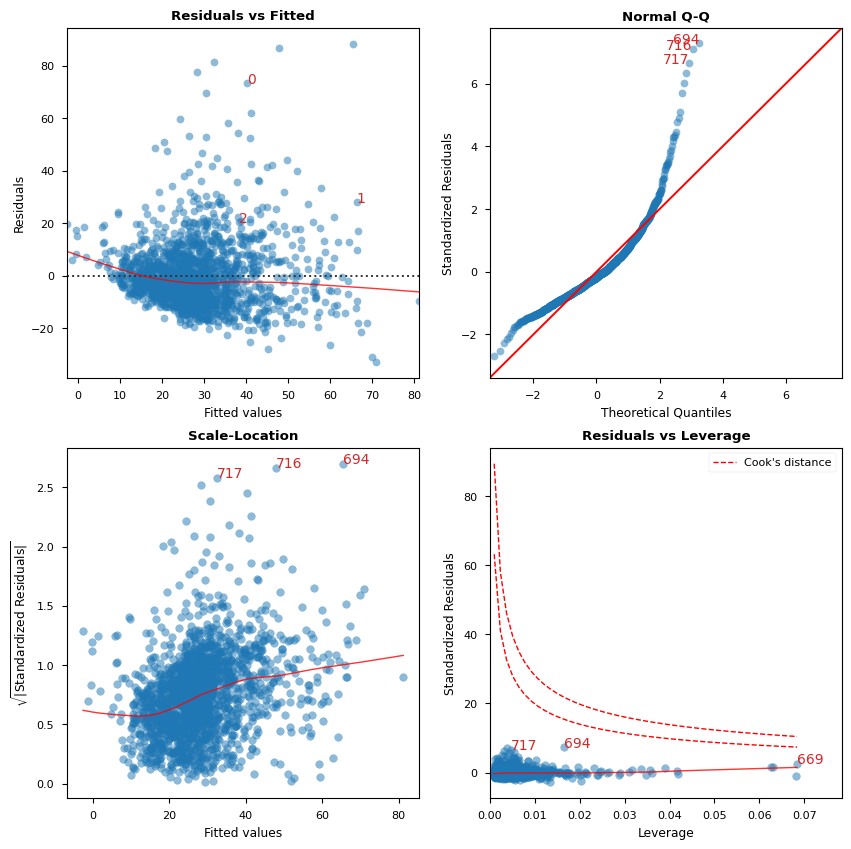

                        Features  VIF Factor
1        C(day_type)[T.Saturday]        1.04
2  C(day_type)[T.Sunday/Holiday]        1.04
5                           prec        1.33
4                      temp_diff        1.33
3                       humidity        1.77
7                  peak_velocity        2.41
6                      windspeed        2.75
0                      Intercept       86.38


In [52]:
diagnostics = Linear_Reg_Diagnostic(pm10_model_diff)
diagnostics()
plt.show()

Die R2 und R2_adj haben sich für beide Betrachtungen verbessert. Windspeed hat einen relativ hohen P-Wert in der PM10 Betrachtung. 

In [53]:
# data1519_day_type_converted = pd.get_dummies(data1519, columns=['day_type'])

# data1519_day_type_converted['day_type_Weekday'] = data1519_day_type_converted['day_type_Weekday'].astype(int)
# data1519_day_type_converted['day_type_Saturday'] = data1519_day_type_converted['day_type_Saturday'].astype(int)
# data1519_day_type_converted['day_type_Sunday/Holiday'] = data1519_day_type_converted['day_type_Sunday/Holiday'].astype(int)

# new_column_names = {
#     'day_type_Sunday/Holiday': 'Typ_Sonntag_Feiertag'
# }
# data1519_day_type_converted.rename(columns=new_column_names, inplace=True)

# data1519_day_type_converted.head()

In [54]:
# no2_model_conv = smf.ols("no2 ~ humidity + temp + prec + windspeed + peak_velocity + day_type_Weekday + day_type_Saturday + Typ_Sonntag_Feiertag", data=data1519_day_type_converted).fit()

# print(no2_model_conv.summary())

# Dies führt zu einer multicollinearity warning, also nicht sinnvoll

# 4. Erstellen Sie Variablen, die vielleicht hilfreich sein können, z.B. eine Variable die frost (temperatur < 0) anzeigt, eine Variable die inversion anzeigt (temperatur_differenz < 0), eine Variable die starken Wind anzeigt (z.B. wind_speed > 0.6), eine Variable für das Jahr, etc. Versuchen Sie, lagged values für meteorologische Einflüsse einzufügen, z.B. die Temperatur des Vortages etc. Helfen diese Variablen? Adaptieren Sie Ihr Modell passend!

## Neue Variablen anlegen

In [55]:
data1519['frost'] = data1519['temp'] < 0
data1519['inversion'] = data1519['temp_diff'] < 0
data1519['strong_wind'] = data1519['windspeed'] > 0.6
data1519['year'] = data1519.index.year
data1519['month'] = data1519.index.month

## Lagged values anlegen

In [56]:
data1519['temp_lag1'] = data1519['temp'].shift(1)
data1519['humidity_lag1'] = data1519['humidity'].shift(1)
data1519['prec_lag1'] = data1519['prec'].shift(1)
data1519['windspeed_lag1'] = data1519['windspeed'].shift(1)
data1519['peak_velocity_lag1'] = data1519['peak_velocity'].shift(1)